# Time operations

Time operations are notoriously difficult. In this notebook we go through some of scmdata's time operation capabilities.

## Imports

In [1]:
# NBVAL_IGNORE_OUTPUT
import datetime as dt

from scmdata import ScmDataFrame, df_append

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

<IPython.core.display.Javascript object>

## Data

Here we use the RCP26 emissions data. This originally came from http://www.pik-potsdam.de/~mmalte/rcps/ and has since been re-written into a format which can be read by scmdata using the [pymagicc](https://github.com/openclimatedata/pymagicc) library. We are not currently planning on importing Pymagicc's readers into scmdata by default, please raise an issue [here](https://github.com/lewisjared/scmdata/issues) if you would like us to consider doing so.

In [2]:
rcp26 = ScmDataFrame("rcp26_emissions.csv")
rcp26.set_meta("raw", "time operation")

For illustrative purposes, we shift the time points of the raw data before moving on.

In [3]:
rcp26 = rcp26.timeseries()
rcp26.columns = rcp26.columns.map(lambda x: dt.datetime(x.year, 3, 17))
rcp26 = ScmDataFrame(rcp26)
rcp26.head()

time                                                                               1765-03-17 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        raw                        0.000000   
                      Emissions|C2F6  kt C2F6 / yr  average        raw                        0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        raw                        0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        raw                        0.000000   
                      Emissions|CF4   kt CF4 / yr   average        raw                        0.010763   

time                                                                               1766-03-17 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        raw                        0.106998   
                      Emissions|C2F6  kt C2F6 / yr  average        raw                        0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        raw                        0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        raw                        0.000000   
                      Emissions|CF4   kt CF4 / yr   average        raw                        0.010752   

time                                                                               1767-03-17 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        raw                        0.133383   
                      Emissions|C2F6  kt C2F6 / yr  average        raw                        0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        raw                        0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        raw                        0.000000   
                      Emissions|CF4   kt CF4 / yr   average        raw                        0.010748   

time                                                                               1768-03-17 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        raw                        0.159847   
                      Emissions|C2F6  kt C2F6 / yr  average        raw                        0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        raw                        0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        raw                        0.000000   
                      Emissions|CF4   kt CF4 / yr   average        raw                        0.010744   

time                                                                               1769-03-17 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        raw                        0.186393   
                      Emissions|C2F6  kt C2F6 / yr  average        raw                        0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        raw                        0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        raw                        0.000000   
                      Emissions|CF4   kt CF4 / yr   average        raw                        0.010740   

time                                                                               1770-03-17 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        raw   

## Resampling

The first method to consider is `resample`. This allows us to resample a dataframe onto different timesteps. Below, we resample the data onto monthly timesteps.

In [4]:
rcp26_monthly = rcp26.resample("MS")
rcp26_monthly.set_meta("start of month", "time operation")
rcp26_monthly.head()

time                                                                               1765-03-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        start of month            -0.004690   
                      Emissions|C2F6  kt C2F6 / yr  average        start of month             0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        start of month             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        start of month             0.000000   
                      Emissions|CF4   kt CF4 / yr   average        start of month             0.010763   

time                                                                               1765-04-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        start of month             0.004397   
                      Emissions|C2F6  kt C2F6 / yr  average        start of month             0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        start of month             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        start of month             0.000000   
                      Emissions|CF4   kt CF4 / yr   average        start of month             0.010762   

time                                                                               1765-05-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        start of month             0.013192   
                      Emissions|C2F6  kt C2F6 / yr  average        start of month             0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        start of month             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        start of month             0.000000   
                      Emissions|CF4   kt CF4 / yr   average        start of month             0.010761   

time                                                                               1765-06-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        start of month             0.022279   
                      Emissions|C2F6  kt C2F6 / yr  average        start of month             0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        start of month             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        start of month             0.000000   
                      Emissions|CF4   kt CF4 / yr   average        start of month             0.010761   

time                                                                               1765-07-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        start of month             0.031073   
                      Emissions|C2F6  kt C2F6 / yr  average        start of month             0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        start of month             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        start of month             0.000000   
                      Emissions|CF4   kt CF4 / yr   average        start of month             0.010760   

time                                                                               1765-08-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        start 

We can also resample to e.g. start of year or end of year.

In [5]:
rcp26_end_of_year = rcp26.resample("A")
rcp26_end_of_year.set_meta("end of year", "time operation")
rcp26_end_of_year.head()

time                                                                               1764-12-31 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        end of year               -0.022279   
                      Emissions|C2F6  kt C2F6 / yr  average        end of year                0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        end of year                0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        end of year                0.000000   
                      Emissions|CF4   kt CF4 / yr   average        end of year                0.010765   

time                                                                               1765-12-31 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        end of year                0.084719   
                      Emissions|C2F6  kt C2F6 / yr  average        end of year                0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        end of year                0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        end of year                0.000000   
                      Emissions|CF4   kt CF4 / yr   average        end of year                0.010754   

time                                                                               1766-12-31 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        end of year                0.127889   
                      Emissions|C2F6  kt C2F6 / yr  average        end of year                0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        end of year                0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        end of year                0.000000   
                      Emissions|CF4   kt CF4 / yr   average        end of year                0.010749   

time                                                                               1767-12-31 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        end of year                0.154279   
                      Emissions|C2F6  kt C2F6 / yr  average        end of year                0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        end of year                0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        end of year                0.000000   
                      Emissions|CF4   kt CF4 / yr   average        end of year                0.010745   

time                                                                               1768-12-31 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        end of year                0.180866   
                      Emissions|C2F6  kt C2F6 / yr  average        end of year                0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        end of year                0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        end of year                0.000000   
                      Emissions|CF4   kt CF4 / yr   average        end of year                0.010741   

time                                                                               1769-12-31 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        end of

In [6]:
rcp26_start_of_year = rcp26.resample("AS")
rcp26_start_of_year.set_meta("start of year", "time operation")
rcp26_start_of_year.head()

time                                                                               1765-01-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        start of year             -0.021986   
                      Emissions|C2F6  kt C2F6 / yr  average        start of year              0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        start of year              0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        start of year              0.000000   
                      Emissions|CF4   kt CF4 / yr   average        start of year              0.010765   

time                                                                               1766-01-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        start of year              0.085012   
                      Emissions|C2F6  kt C2F6 / yr  average        start of year              0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        start of year              0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        start of year              0.000000   
                      Emissions|CF4   kt CF4 / yr   average        start of year              0.010754   

time                                                                               1767-01-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        start of year              0.127961   
                      Emissions|C2F6  kt C2F6 / yr  average        start of year              0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        start of year              0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        start of year              0.000000   
                      Emissions|CF4   kt CF4 / yr   average        start of year              0.010749   

time                                                                               1768-01-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        start of year              0.154351   
                      Emissions|C2F6  kt C2F6 / yr  average        start of year              0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        start of year              0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        start of year              0.000000   
                      Emissions|CF4   kt CF4 / yr   average        start of year              0.010745   

time                                                                               1769-01-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        start of year              0.180938   
                      Emissions|C2F6  kt C2F6 / yr  average        start of year              0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        start of year              0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        start of year              0.000000   
                      Emissions|CF4   kt CF4 / yr   average        start of year              0.010741   

time                                                                               1770-01-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        start 

## Interpolating

Not all time points are supported by resampling. If we want to use custom time points (e.g. middle of year), we can do that with interpolate.

In [7]:
rcp26_middle_of_year = rcp26.interpolate(
    target_times=sorted([dt.datetime(v, 7, 1) for v in set([v.year for v in rcp26["time"]])])
)
rcp26_middle_of_year.set_meta("middle of year", "time operation")
rcp26_middle_of_year.head()

time                                                                               1765-07-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        middle of year             0.031073   
                      Emissions|C2F6  kt C2F6 / yr  average        middle of year             0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        middle of year             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        middle of year             0.000000   
                      Emissions|CF4   kt CF4 / yr   average        middle of year             0.010760   

time                                                                               1766-07-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        middle of year             0.114660   
                      Emissions|C2F6  kt C2F6 / yr  average        middle of year             0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        middle of year             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        middle of year             0.000000   
                      Emissions|CF4   kt CF4 / yr   average        middle of year             0.010751   

time                                                                               1767-07-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        middle of year             0.141047   
                      Emissions|C2F6  kt C2F6 / yr  average        middle of year             0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        middle of year             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        middle of year             0.000000   
                      Emissions|CF4   kt CF4 / yr   average        middle of year             0.010747   

time                                                                               1768-07-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        middle of year             0.167556   
                      Emissions|C2F6  kt C2F6 / yr  average        middle of year             0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        middle of year             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        middle of year             0.000000   
                      Emissions|CF4   kt CF4 / yr   average        middle of year             0.010743   

time                                                                               1769-07-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        middle of year             0.194127   
                      Emissions|C2F6  kt C2F6 / yr  average        middle of year             0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        middle of year             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        middle of year             0.000000   
                      Emissions|CF4   kt CF4 / yr   average        middle of year             0.010738   

time                                                                               1770-07-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        middle

## Time means

With monthly data, we can then take time means. Most of the time we just want to take the annual mean. This can be done as shown below.

### Annual mean

In [8]:
rcp26_annual_mean = rcp26_monthly.time_mean("year")
rcp26_annual_mean.set_meta("annual mean", "time operation")
rcp26_annual_mean.head()

time                                                                               1765-07-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        annual mean                0.035676   
                      Emissions|C2F6  kt C2F6 / yr  average        annual mean                0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        annual mean                0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        annual mean                0.000000   
                      Emissions|CF4   kt CF4 / yr   average        annual mean                0.010759   

time                                                                               1766-07-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        annual mean                0.111128   
                      Emissions|C2F6  kt C2F6 / yr  average        annual mean                0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        annual mean                0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        annual mean                0.000000   
                      Emissions|CF4   kt CF4 / yr   average        annual mean                0.010751   

time                                                                               1767-07-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        annual mean                0.139999   
                      Emissions|C2F6  kt C2F6 / yr  average        annual mean                0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        annual mean                0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        annual mean                0.000000   
                      Emissions|CF4   kt CF4 / yr   average        annual mean                0.010747   

time                                                                               1768-07-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        annual mean                0.166494   
                      Emissions|C2F6  kt C2F6 / yr  average        annual mean                0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        annual mean                0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        annual mean                0.000000   
                      Emissions|CF4   kt CF4 / yr   average        annual mean                0.010743   

time                                                                               1769-07-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        annual mean                0.193071   
                      Emissions|C2F6  kt C2F6 / yr  average        annual mean                0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        annual mean                0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        annual mean                0.000000   
                      Emissions|CF4   kt CF4 / yr   average        annual mean                0.010739   

time                                                                               1770-07-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        annual

As the data is an annual mean, we put it in July 1st (which is more or less the centre of the year).

### Annual mean centred on January 1st

Sometimes we want to take annual means centred on January 1st, rather than the middle of the year. This can be done as shown.

In [9]:
rcp26_annual_mean_jan_1 = rcp26_monthly.time_mean("year_beginning_of_year")
rcp26_annual_mean_jan_1.set_meta("annual mean Jan 1", "time operation")
rcp26_annual_mean_jan_1.head()

time                                                                                  1765-01-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                           
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        annual mean Jan 1             0.008794   
                      Emissions|C2F6  kt C2F6 / yr  average        annual mean Jan 1             0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        annual mean Jan 1             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        annual mean Jan 1             0.000000   
                      Emissions|CF4   kt CF4 / yr   average        annual mean Jan 1             0.010762   

time                                                                                  1766-01-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                           
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        annual mean Jan 1             0.077819   
                      Emissions|C2F6  kt C2F6 / yr  average        annual mean Jan 1             0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        annual mean Jan 1             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        annual mean Jan 1             0.000000   
                      Emissions|CF4   kt CF4 / yr   average        annual mean Jan 1             0.010755   

time                                                                                  1767-01-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                           
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        annual mean Jan 1             0.126805   
                      Emissions|C2F6  kt C2F6 / yr  average        annual mean Jan 1             0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        annual mean Jan 1             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        annual mean Jan 1             0.000000   
                      Emissions|CF4   kt CF4 / yr   average        annual mean Jan 1             0.010749   

time                                                                                  1768-01-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                           
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        annual mean Jan 1             0.153223   
                      Emissions|C2F6  kt C2F6 / yr  average        annual mean Jan 1             0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        annual mean Jan 1             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        annual mean Jan 1             0.000000   
                      Emissions|CF4   kt CF4 / yr   average        annual mean Jan 1             0.010745   

time                                                                                  1769-01-01 00:00:00  \
model scenario region variable        unit          parameter_type time operation                           
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        annual mean Jan 1             0.179777   
                      Emissions|C2F6  kt C2F6 / yr  average        annual mean Jan 1             0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        annual mean Jan 1             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        annual mean Jan 1             0.000000   
                      Emissions|CF4   kt CF4 / yr   average        annual mean Jan 1             0.010741   

time                                                                                  1770-01-01 00:00:00  \
model scenario region variable        unit          parameter_type time

As the data is centred on January 1st, we put it in January 1st.

### Annual mean centred on December 31st

Sometimes we want to take annual means centred on December 31st, rather than the middle of the year. This can be done as shown.

In [10]:
rcp26_annual_mean_dec_31 = rcp26_monthly.time_mean("year_end_of_year")
rcp26_annual_mean_dec_31.set_meta("annual mean Dec 31", "time operation")
rcp26_annual_mean_dec_31.head()

time                                                                                   1764-12-31 00:00:00  \
model scenario region variable        unit          parameter_type time operation                            
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        annual mean Dec 31             0.008794   
                      Emissions|C2F6  kt C2F6 / yr  average        annual mean Dec 31             0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        annual mean Dec 31             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        annual mean Dec 31             0.000000   
                      Emissions|CF4   kt CF4 / yr   average        annual mean Dec 31             0.010762   

time                                                                                   1765-12-31 00:00:00  \
model scenario region variable        unit          parameter_type time operation                            
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        annual mean Dec 31             0.077819   
                      Emissions|C2F6  kt C2F6 / yr  average        annual mean Dec 31             0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        annual mean Dec 31             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        annual mean Dec 31             0.000000   
                      Emissions|CF4   kt CF4 / yr   average        annual mean Dec 31             0.010755   

time                                                                                   1766-12-31 00:00:00  \
model scenario region variable        unit          parameter_type time operation                            
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        annual mean Dec 31             0.126805   
                      Emissions|C2F6  kt C2F6 / yr  average        annual mean Dec 31             0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        annual mean Dec 31             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        annual mean Dec 31             0.000000   
                      Emissions|CF4   kt CF4 / yr   average        annual mean Dec 31             0.010749   

time                                                                                   1767-12-31 00:00:00  \
model scenario region variable        unit          parameter_type time operation                            
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        annual mean Dec 31             0.153223   
                      Emissions|C2F6  kt C2F6 / yr  average        annual mean Dec 31             0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        annual mean Dec 31             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        annual mean Dec 31             0.000000   
                      Emissions|CF4   kt CF4 / yr   average        annual mean Dec 31             0.010745   

time                                                                                   1768-12-31 00:00:00  \
model scenario region variable        unit          parameter_type time operation                            
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    average        annual mean Dec 31             0.179777   
                      Emissions|C2F6  kt C2F6 / yr  average        annual mean Dec 31             0.000000   
                      Emissions|C6F14 kt C6F14 / yr average        annual mean Dec 31             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average        annual mean Dec 31             0.000000   
                      Emissions|CF4   kt CF4 / yr   average        annual mean Dec 31             0.010741   

time                                                                                   1769-12-31 00:00:00  \
model scenario region variable     

As the data is centred on December 31st, we put it in December 31st.

## Comparing the results

We can compare the impact of these different methods with a plot as shown below.

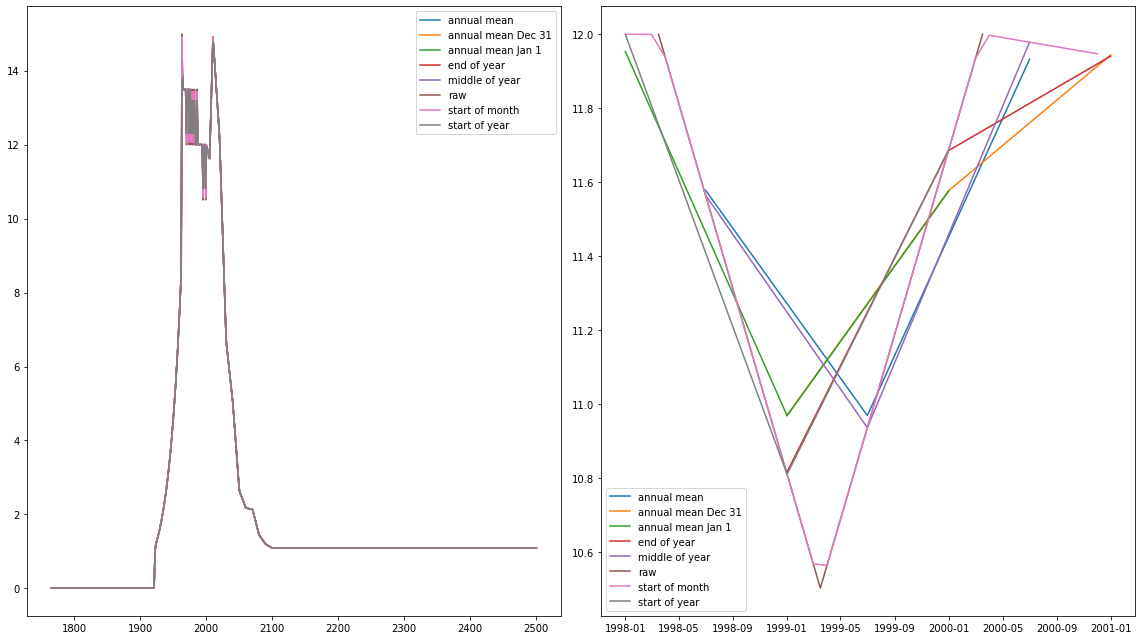

In [11]:
var_to_plot = "Emissions|CF4"
pdf = df_append([
    rcp26, rcp26_monthly, 
    rcp26_start_of_year, rcp26_middle_of_year, rcp26_end_of_year,
    rcp26_annual_mean, rcp26_annual_mean_jan_1, rcp26_annual_mean_dec_31
])

fig = plt.figure(figsize=(16, 9))
# TODO: raise bug in pyam about plotting not working with time
# when you're on different time grids
def _plot_hack(idf, ax, color_col):
    for label, df in idf.timeseries().groupby(color_col):
        df = df.dropna(how="all", axis=1)
        ax.plot(df.columns.values.squeeze(), df.values.squeeze(), label=label)
        
ax = fig.add_subplot(121)
_plot_hack(pdf.filter(variable=var_to_plot), ax, "time operation")
ax.legend()

ax = fig.add_subplot(122)
_plot_hack(pdf.filter(variable=var_to_plot, year=range(1998, 2001)), ax, "time operation")
ax.legend()

plt.tight_layout()

When the timeseries is particularly noisy, the different operations result in slightly different timeseries. For example, shifting to start of month smooths the data a bit (as you're interpolating and resampling the underlying data) while taking means centred on different points in time changes your mean as you take different windows of your monthly data.

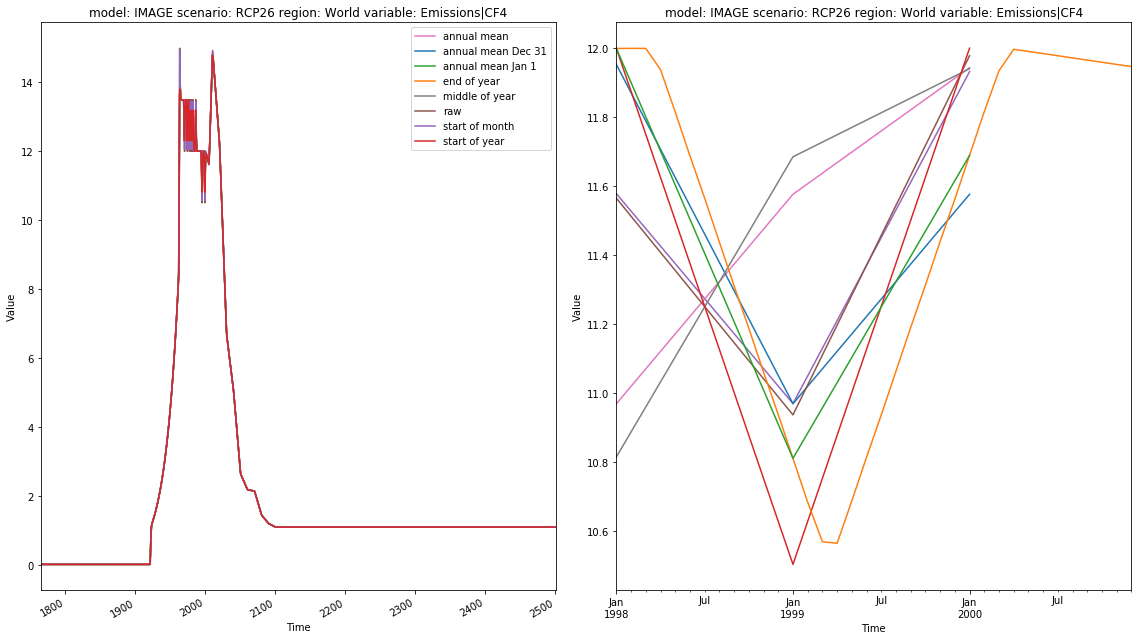

In [12]:
fig = plt.figure(figsize=(16, 9))

# TODO: raise bug in pyam about plotting not working with time
# when you're on different time grids, the plot below is clearly
# wrong
        
ax = fig.add_subplot(121)
pdf.filter(variable=var_to_plot).line_plot(ax=ax, color="time operation")

ax = fig.add_subplot(122)
pdf.filter(variable=var_to_plot, year=range(1998, 2001)).line_plot(ax=ax, color="time operation", legend=False)

plt.tight_layout()

The lines above don't match the underlying timeseries e.g. the monthly data minimum is in the wrong place.

In [13]:
# NBVAL_IGNORE_OUTPUT
rcp26_monthly.filter(variable=var_to_plot, year=range(1998, 2001), month=[2, 3, 4, 5]).timeseries()

,,,,,,time,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1999-02-01 00:00:00,1999-03-01 00:00:00,1999-04-01 00:00:00,1999-05-01 00:00:00,2000-02-01 00:00:00,2000-03-01 00:00:00,2000-04-01 00:00:00,2000-05-01 00:00:00
model,scenario,region,variable,unit,parameter_type,time operation,,,,,,,,,,,,
IMAGE,RCP26,World,Emissions|CF4,kt CF4 / yr,average,start of month,11.999545,11.999564,11.938059,11.815028,10.683138,10.568309,10.564061,10.6868,11.815992,11.93464,11.997014,11.990841


The conversion to an iam dataframe seems to be fine so it seems to be something to do with pandas underlying plotting and nan handling which is the problem.

In [14]:
# NBVAL_IGNORE_OUTPUT
rcp26_monthly.filter(variable=var_to_plot, year=range(1998, 2001), month=[2, 3, 4, 5]).to_iamdataframe().timeseries()

,,,,,,,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1999-02-01 00:00:00,1999-03-01 00:00:00,1999-04-01 00:00:00,1999-05-01 00:00:00,2000-02-01 00:00:00,2000-03-01 00:00:00,2000-04-01 00:00:00,2000-05-01 00:00:00
model,scenario,region,variable,unit,parameter_type,time operation,,,,,,,,,,,,
IMAGE,RCP26,World,Emissions|CF4,kt CF4 / yr,average,start of month,11.999545,11.999564,11.938059,11.815028,10.683138,10.568309,10.564061,10.6868,11.815992,11.93464,11.997014,11.990841


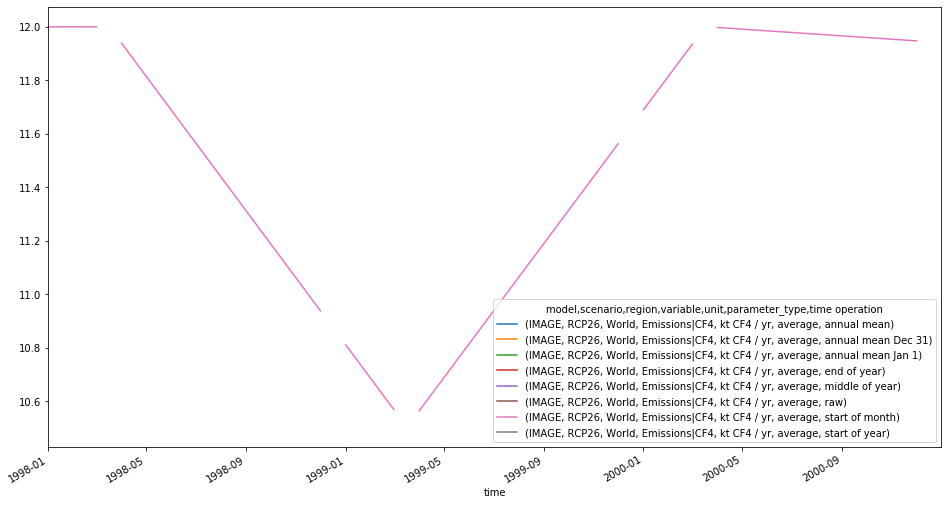

In [15]:
# NBVAL_IGNORE_OUTPUT
pdf.filter(variable=var_to_plot, year=range(1998, 2001)).timeseries().T.plot(figsize=(16, 9))

In [16]:
pdf.filter(variable=var_to_plot, year=range(1998, 2001)).timeseries().T.sort_index()

model                       IMAGE                                       \
scenario                    RCP26                                        
region                      World                                        
variable            Emissions|CF4                                        
unit                  kt CF4 / yr                                        
parameter_type            average                                        
time operation        annual mean annual mean Dec 31 annual mean Jan 1   
time                                                                     
1998-01-01 00:00:00           NaN                NaN         11.953026   
1998-02-01 00:00:00           NaN                NaN               NaN   
1998-03-01 00:00:00           NaN                NaN               NaN   
1998-03-17 00:00:00           NaN                NaN               NaN   
1998-04-01 00:00:00           NaN                NaN               NaN   
1998-05-01 00:00:00           NaN                NaN               NaN   
1998-06-01 00:00:00           NaN                NaN               NaN   
1998-07-01 00:00:00     11.578184                NaN               NaN   
1998-08-01 00:00:00           NaN                NaN               NaN   
1998-09-01 00:00:00           NaN                NaN               NaN   
1998-10-01 00:00:00           NaN                NaN               NaN   
1998-11-01 00:00:00           NaN                NaN               NaN   
1998-12-01 00:00:00           NaN                NaN               NaN   
1998-12-31 00:00:00           NaN          10.968734               NaN   
1999-01-01 00:00:00           NaN                NaN         10.968734   
1999-02-01 00:00:00           NaN                NaN               NaN   
1999-03-01 00:00:00           NaN                NaN               NaN   
1999-03-17 00:00:00           NaN                NaN               NaN   
1999-04-01 00:00:00           NaN                NaN               NaN   
1999-05-01 00:00:00           NaN                NaN               NaN   
1999-06-01 00:00:00           NaN                NaN               NaN   
1999-07-01 00:00:00     10.969208                NaN               NaN   
1999-08-01 00:00:00           NaN                NaN               NaN   
1999-09-01 00:00:00           NaN                NaN               NaN   
1999-10-01 00:00:00           NaN                NaN               NaN   
1999-11-01 00:00:00           NaN                NaN               NaN   
1999-12-01 00:00:00           NaN                NaN               NaN   
1999-12-31 00:00:00           NaN          11.576366               NaN   
2000-01-01 00:00:00           NaN                NaN         11.576366   
2000-02-01 00:00:00           NaN                NaN               NaN   
2000-03-01 00:00:00           NaN                NaN               NaN   
2000-03-17 00:00:00           NaN                NaN               NaN   
2000-04-01 00:00:00           NaN                NaN               NaN   
2000-05-01 00:00:00           NaN                NaN               NaN   
2000-06-01 00:00:00           NaN                NaN               NaN   
2000-07-01 00:00:00     11.932250                NaN               NaN   
2000-08-01 00:00:00           NaN                NaN               NaN   
2000-09-01 00:00:00           NaN                NaN               NaN   
2000-10-01 00:00:00           NaN                NaN               NaN   
2000-11-01 00:00:00           NaN                NaN               NaN   
2000-12-01 00:00:00           NaN                NaN               NaN   
2000-12-31 00:00:00           NaN          11.943668               NaN   

model                                                                     \
scenario                                                                   
region                                                                     
variable                                                               